In [1]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim

import numpy as np
from matplotlib import pyplot as plt

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## Task 1: Linear case


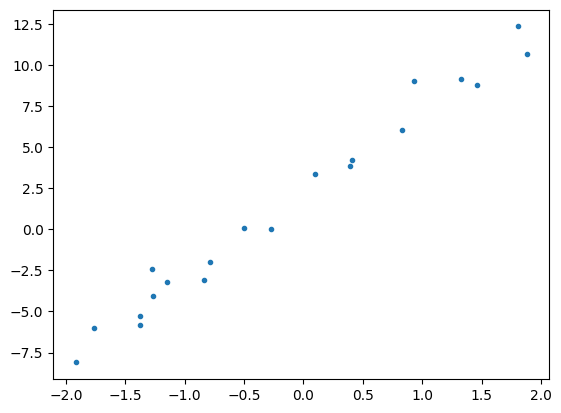

In [3]:
np.random.seed(42)
x_data = np.sort(-2. + 4. * np.random.rand(20))
y_data = 5. * x_data + 2.5 + np.random.randn(20)

plt.plot(x_data, y_data, '.')

# reshape x_data to 20x1
x = torch.tensor( x_data.reshape(20,-1).astype(np.float32))
y = torch.tensor(y_data.reshape(20,-1).astype(np.float32))

## Task 2: Non-Linear case

Design a 2 hidden layer neural network to predict the following synthetic dataset

/var/folders/vc/g34cbkj15fxcx_rfggrk2f500000gn/T/ipykernel_20514/3208077594.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2


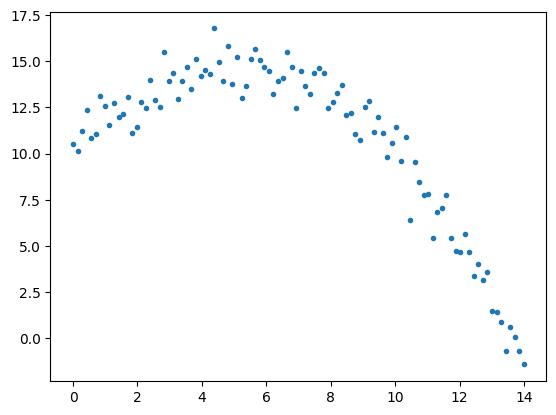

In [4]:
# Generate synthetic data for number of hours spend on video games vs happiness level
np.random.seed(42)
hours = torch.linspace(0, 14, 100).view(-1, 1) # 100 numbers between 0 and 14
happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2
x = hours
y = happiness

plt.plot(x,y,'.')

Epoch: [500/10000], Loss: 23.0850
Epoch: [1000/10000], Loss: 5.8419
Epoch: [1500/10000], Loss: 4.3954
Epoch: [2000/10000], Loss: 2.9964
Epoch: [2500/10000], Loss: 2.4710
Epoch: [3000/10000], Loss: 1.9475
Epoch: [3500/10000], Loss: 1.4378
Epoch: [4000/10000], Loss: 1.4262
Epoch: [4500/10000], Loss: 1.3126
Epoch: [5000/10000], Loss: 1.2456
Epoch: [5500/10000], Loss: 1.0679
Epoch: [6000/10000], Loss: 1.0671
Epoch: [6500/10000], Loss: 1.1241
Epoch: [7000/10000], Loss: 1.0290
Epoch: [7500/10000], Loss: 0.9904
Epoch: [8000/10000], Loss: 0.9835
Epoch: [8500/10000], Loss: 0.8299
Epoch: [9000/10000], Loss: 1.0489
Epoch: [9500/10000], Loss: 0.9509
Epoch: [10000/10000], Loss: 0.9812


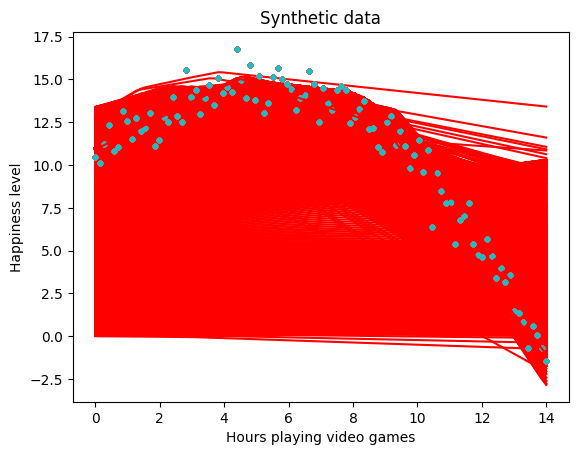

In [10]:
#TODO

class MyModel (nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(1, 6, bias=True)
        self.layer2 = nn.Linear(6, 6)
        self.layer3 = nn.Linear(6, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x
    
model = MyModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

num_epochs = 10000
for epoch in range (num_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch: [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    plt.plot(x, y, '.')
    out = model(x)
    plt.plot(x, out.detach().numpy(), 'r')
    plt.xlabel('Hours playing video games')
    plt.ylabel('Happiness level')
    plt.title('Synthetic data')